In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 80

### Load Data

In [12]:
df = pd.read_csv('data/7wonders.csv')
df.dropna(axis=1, inplace=True)

In [13]:
df.head()

,Jogo#,Jogador,Tabuleiro,Militar,Riqueza,Maravilha,Civil,Comércio,Ciência,Guilda,Cidade,Total,Posição
0,1,Rajiv,Éphesos,4,10,10,22,3,0,7,8,64,1
1,1,Clara,Halikarnassós,5,1,3,11,0,20,0,0,40,4
2,1,Theo,Rhódos,15,6,7,9,4,10,7,0,58,2
3,1,Lais,Olympía,-4,1,5,19,3,2,13,3,42,3
4,2,Rajiv,Rhódos,17,1,7,15,12,0,11,0,63,1


List of matches

In [14]:
matches = list(set(df['Jogo#']))
wins = dict.fromkeys(list(set(df['Jogador'])), 0)
print(matches)
print(wins)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]
{'Leandro': 0, 'Theo': 0, 'Felipe': 0, 'Rajiv': 0, 'Rafael': 0, 'Guga': 0, 'Bia': 0, 'Junior': 0, 'A Crente': 0, 'Laura': 0, 'Radif': 0, 'Milleny': 0, 'Lais': 0, 'Keverson': 0, 'Gustavo': 0, 'Bial': 0, 'Clara': 0}


In [15]:
matches_played = df['Jogador'].value_counts().to_dict()
print(matches_played)

{'Lais': 97, 'Theo': 91, 'Rajiv': 66, 'Clara': 63, 'Laura': 61, 'Radif': 26, 'Leandro': 25, 'Gustavo': 11, 'Rafael': 9, 'Bia': 8, 'Milleny': 7, 'Guga': 5, 'Keverson': 3, 'Bial': 3, 'Junior': 2, 'A Crente': 2, 'Felipe': 1}


Set index to Jogo# so df.loc\[match_number\] can refer to a single match

In [16]:
df_indexed = df.set_index('Jogo#')
df_indexed.head(10)

,Jogador,Tabuleiro,Militar,Riqueza,Maravilha,Civil,Comércio,Ciência,Guilda,Cidade,Total,Posição
Jogo#,,,,,,,,,,,,
1,Rajiv,Éphesos,4,10,10,22,3,0,7,8,64,1
1,Clara,Halikarnassós,5,1,3,11,0,20,0,0,40,4
1,Theo,Rhódos,15,6,7,9,4,10,7,0,58,2
1,Lais,Olympía,-4,1,5,19,3,2,13,3,42,3
2,Rajiv,Rhódos,17,1,7,15,12,0,11,0,63,1
2,Clara,Alexandria,-4,6,7,8,0,25,0,15,57,2
2,Theo,Olympía,6,-2,5,23,3,0,9,0,44,3
2,Lais,Babylon,1,4,10,10,0,10,0,0,35,4
3,Rajiv,Olympía,10,2,5,28,0,0,12,2,59,4


In [17]:
for match in matches:
    temp_df = df_indexed.loc[match]
    wins[temp_df[temp_df['Total']==temp_df['Total'].max()].iloc[0]['Jogador']] += 1

print(dict(sorted(wins.items(), key=lambda x:x[1], reverse=True)))

{'Rajiv': 36, 'Theo': 22, 'Lais': 16, 'Laura': 9, 'Radif': 9, 'Clara': 6, 'Leandro': 3, 'Rafael': 2, 'Gustavo': 2, 'Guga': 1, 'Felipe': 0, 'Bia': 0, 'Junior': 0, 'A Crente': 0, 'Milleny': 0, 'Keverson': 0, 'Bial': 0}


In [18]:
winrate = {}
for key in wins.keys():
    winrate[key] = 100.0 * wins[key] / matches_played[key]

winrate = dict(sorted(winrate.items(), key=lambda x: x[1], reverse=True))
print(winrate)

{'Rajiv': 54.54545454545455, 'Radif': 34.61538461538461, 'Theo': 24.175824175824175, 'Rafael': 22.22222222222222, 'Guga': 20.0, 'Gustavo': 18.181818181818183, 'Lais': 16.49484536082474, 'Laura': 14.754098360655737, 'Leandro': 12.0, 'Clara': 9.523809523809524, 'Felipe': 0.0, 'Bia': 0.0, 'Junior': 0.0, 'A Crente': 0.0, 'Milleny': 0.0, 'Keverson': 0.0, 'Bial': 0.0}


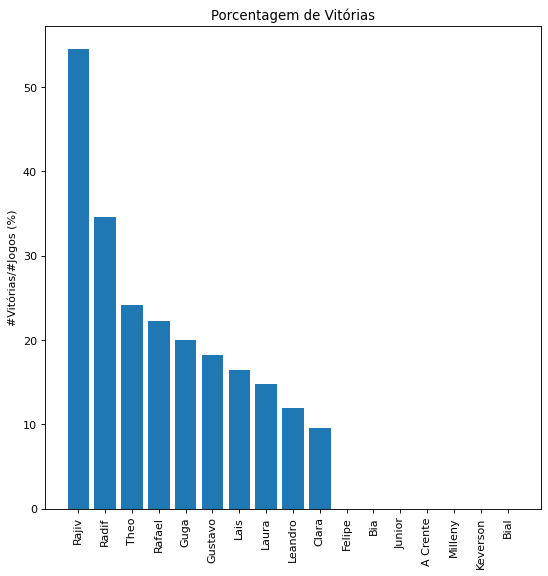

In [19]:
plt.bar(*zip(*winrate.items()))
plt.xticks(rotation='vertical')
plt.ylabel('#Vitórias/#Jogos (%)')
plt.title('Porcentagem de Vitórias')
plt.show()

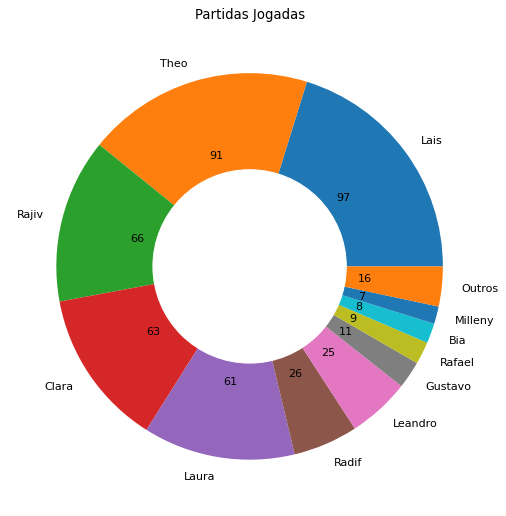

In [20]:
plot_matches_played = matches_played.copy()
thresh = 5
others = 0
keys_to_remove = []
for k,v in plot_matches_played.items():
    if v <= thresh:
        others += v
        keys_to_remove.append(k)

for k in keys_to_remove:
    del plot_matches_played[k]
plot_matches_played['Outros'] = others

plt.pie([float(v) for v in plot_matches_played.values()], labels=plot_matches_played.keys(),
autopct=lambda m: '{:.0f}'.format(m/100.0*sum(plot_matches_played.values())))
plt.title('Partidas Jogadas')

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()